In [125]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib
import re
def remove_whitespaces(s: str):
    return re.sub(r'\s+', '', s)

sns.set_context("paper", font_scale=3)
sns.set_palette("deep")
color_palette = sns.color_palette()
color_palette
DATE='0611'

In [2]:
# const GLenum POINTS                         = 0x0000;
# const GLenum LINES                          = 0x0001;
# const GLenum LINE_LOOP                      = 0x0002;
# const GLenum LINE_STRIP                     = 0x0003;
# const GLenum TRIANGLES                      = 0x0004;
# const GLenum TRIANGLE_STRIP                 = 0x0005;
# const GLenum TRIANGLE_FAN                   = 0x0006;
gl_types = {
    0: "POINTS",
    1: "LINES",
    2: "LINE_LOOP",
    3: "LINE_STRIP",
    4: "TRIANGLES",
    5: "TRIANGLE_STRIP",
    6: "TRIANGLE_FAN",
}

In [3]:
# df_frame = pd.read_pickle('imr/0501-df_frame-raf.pkl.zst', compression='zstd')
# df_context = pd.read_pickle('imr/0501-df_context.pkl.zst', compression='zstd')
df_context_noraf = pd.read_pickle(f'imr/{DATE}-df_context-noraf.pkl.zst', compression='zstd')
df_context_noraf = df_context_noraf[df_context_noraf['label_ERROR'].isna() | (df_context_noraf['label_ERROR'] == 0)]
# df_shader = pd.read_pickle('imr/0501-df_shader-noraf.pkl.zst', compression='zstd')

In [4]:
df_context_noraf.columns.to_list()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'manual_interaction',
 'manual_interaction_failed',
 'raf_path',
 'url_essential',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.exception',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPrefe

In [5]:
df_context_noraf['frame.counter.usedWebGL'].isna().sum()

0

In [6]:
df_context_noraf['url'].nunique()

15525

In [7]:
df_context_noraf.shape

(34615, 374)

In [8]:
# print("Frame shape:", df_frame.shape)
print("Context shape:", df_context_noraf.shape)

Context shape: (34615, 374)


In [9]:
def url_essential(x):
    if x.startswith('http://'):
        x = x[7:]
    if x.startswith('https://'):
        x = x[8:]
    return x.strip('/')

In [10]:
func_count_list = [x for x in df_context_noraf.columns.to_list() if x.startswith('frame.context.maghsk.counter.funcCount.')]
draw_commands = [x for x in func_count_list if x.lower().find('draw') != -1]
draw_commands.append('frame.context.maghsk.counter.funcCount.readPixels')
draw_commands

['frame.context.maghsk.counter.funcCount.drawArrays',
 'frame.context.maghsk.counter.funcCount.drawElements',
 'frame.context.maghsk.counter.funcCount.drawBuffers',
 'frame.context.maghsk.counter.funcCount.drawElementsInstanced',
 'frame.context.maghsk.counter.funcCount.drawArraysInstanced',
 'frame.context.maghsk.counter.funcCount.readPixels']

In [11]:
df_context_noraf

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.funcCount.clearBufferfi,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35478,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35479,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35480,116571,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1.686337e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35481,116571,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1.686337e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_context_noraf.duplicated(subset='idx', keep='first')

0        False
1        False
2         True
3         True
4         True
         ...  
35478    False
35479     True
35480    False
35481     True
35482    False
Length: 34615, dtype: bool

In [13]:
# # tmp = df_context_noraf
# tmp = df_context_noraf.duplicated(subset='idx', keep='first')
# tmp = tmp[tmp['frame.url'].map(lambda x: url_essential(x.strip())) != tmp['url'].map(lambda x: url_essential(x.strip()))]
# tmp[tmp[func_count_list].sum(axis=1) > 100][['url', 'frame.url']]

In [14]:
df_context_noraf = df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0]
print("U_w =", df_context_noraf.idx.nunique())
print("F_w =", df_context_noraf['idx-frame'].nunique())
print("C_w =", len(df_context_noraf))
df_context_noraf

U_w = 11994
F_w = 14549
C_w = 27293


,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.funcCount.clearBufferfi,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35478,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35479,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35480,116571,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1.686337e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35481,116571,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1.686337e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drawed Contexts

In [15]:
# draw_commands=[
#     'frame.context.maghsk.counter.funcCount.drawArrays',
#     'frame.context.maghsk.counter.funcCount.drawElements',
#     'frame.context.maghsk.counter.funcCount.drawBuffers',
#     'frame.context.maghsk.counter.funcCount.drawElementsInstanced',
#     'frame.context.maghsk.counter.funcCount.drawArraysInstanced',
#     # 'frame.context.maghsk.counter.funcCount.drawRangeElements',
#     'frame.context.maghsk.counter.funcCount.readPixels',
# ]
# df_context_noraf = df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0]

In [16]:
set(df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0].url.tolist()) - set(df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0].url.tolist())

{'https://svet.skolnimapy.cz/',
 'https://www.geollect.com/',
 'https://www.curbed.com/2023/01/joan-didion-john-gregory-dunne-apartment-sale-east-70th-street.html',
 'https://jianyuanda.en.alibaba.com/',
 'https://www.hcfcd.org/',
 'http://uncensoredlibrary.com/',
 'https://navarrepress.com/terms-of-service/',
 'https://www.gerrishmedesthetics.com/',
 'https://mayco.en.alibaba.com/',
 'https://www.werkladen.de/159gallery-virtuell',
 'https://pollykole.com',
 'https://hilton-slot.online/',
 'https://www.e-bike-stuttgart.com/',
 'https://neondoorlit.com/',
 'https://ocio.iowa.gov/empower-rural-iowa-broadband-grant-program-notice-funding-availability-007',
 'https://w-shopping.co.kr/',
 'https://www.groggerhof.at/',
 'https://www.distillerie-goyard.com/',
 'https://chuhung.en.taiwantrade.com/',
 'https://goobox.fr/bubblesky/bubblesky.html?v=1&lang=en',
 'https://play.1v1battle.com/',
 'https://www.iapopsi.gr/tin-triti-24-1-stis-13-00-i-politiki-kideia-toy-nikoy-xanthopoyloy-sto-a-nekrotaf

In [17]:
url_num = df_context_noraf.idx.nunique()
draw_url_num = df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0].idx.nunique()

In [18]:
print("url_num =", url_num)
print("draw_url_num =", draw_url_num)

url_num = 11994
draw_url_num = 9186


In [67]:
set(df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0].url.to_list())

{'https://bremen.virtualcitymap.de/',
 'http://ruya.ae',
 'https://benfranklinyacht.com/',
 'http://www.grupohodaya.com/',
 'https://marijakosmetik.at/',
 'https://tote.design/cure/',
 'https://ai.sjtu.edu.cn/',
 'https://www.colac-sc.vic.edu.au/',
 'http://www.laihotel.com.tw/en/projects',
 'https://www.labins.org/map',
 'https://tools.skoda.co.uk/enyaq-iv-experience/',
 'https://webty.jp/',
 'http://www.takizawaham.co.jp/corporate',
 'https://sono.livyatanim.com/',
 'https://apod-snippets.vercel.app/',
 'https://1987masters.com/',
 'https://fanstudy.byspotify.com/',
 'https://www.cobo.com/',
 'https://www.renishaw.co.kr/ko/renishaw-virtual-expo--45465',
 'https://www.slimeengine.com/',
 'https://oisraeli.co.il/',
 'https://www.ership.com/',
 'http://mobila.dk/',
 'https://kombuchaonflow.com/',
 'https://relucky.eew.jp/',
 'https://www.pixpal.io/',
 'https://essentuki.superjob.ru/',
 'https://motofun.en.taiwantrade.com/',
 'https://www.unidavi.edu.br/',
 'https://www.cappen.com/',
 'h

In [19]:
# IMPORTANT TODO: check if this is correct
df_context_noraf = df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0]

In [20]:
df_context_noraf[df_context_noraf['url'] == 'https://www.henzensport.ch/'].to_csv('tmp.csv')

In [21]:
# df_context_noraf = df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0]

In [22]:
df_context_noraf.to_pickle(f'imr/{DATE}-draw_df_context_noraf.pkl.zst', compression='zstd')

In [23]:
df_context_noraf['label_usecase'].value_counts()

label_usecase
1    10495
3     1209
4      102
2       50
Name: count, dtype: Int64

In [24]:
tmp = df_context_noraf.drop_duplicates(subset=['idx'])[['label_ERROR', 'label_usecase', 'label_interactions', 'label_comments']]
for col in tmp.columns:
    # print(col)
    print(tmp[col].value_counts())
    print()

label_ERROR
0    9045
Name: count, dtype: Int64

label_usecase
1    7988
3     945
4      76
2      38
Name: count, dtype: Int64

label_interactions
0    7864
1    1183
Name: count, dtype: Int64

label_comments
                  7992
File not found     415
scroll             405
TODO               210
waiting            143
Name: count, dtype: Int64



In [25]:
translate = {
    'bq': 'HTTP Archive',
    'awwwards': 'Crawling/Galleries',
    'tranco': 'Crawling/Top list',
    'cssdesign': 'Crawling/Galleries',
    'threejs': 'Crawling/Galleries',
    'tfjs_gallery': 'Crawling/Galleries',
    'googleart': 'Crawling/Galleries',
    'custom': 'Crawling/Galleries',
    'david': 'Crawling/Galleries',
}
df_context_noraf['data source'] = df_context_noraf['category'].map(lambda x: [translate[y] for y in x])

/tmp/ipykernel_3791123/3740266323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_context_noraf['data source'] = df_context_noraf['category'].map(lambda x: [translate[y] for y in x])


In [26]:
# HTTP Archive          20906
# Crawling/Galleries     4786
# Crawling/Top list      3489

In [27]:
data_sources = ['HTTP Archive','Crawling/Galleries','Crawling/Top list']
for data_source in data_sources:
    tmp = df_context_noraf[df_context_noraf['data source'].map(lambda x: data_source in x)]
    print(data_source, tmp['idx'].nunique(), tmp['idx-frame'].nunique(), tmp.shape[0])

HTTP Archive 7089 7688 9279
Crawling/Galleries 1986 1997 2615
Crawling/Top list 204 206 264


In [28]:
df_context_noraf['idx-frame'].value_counts().describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    9797.000000
mean        1.227927
std         0.904598
min         1.000000
50%         1.000000
75%         1.000000
90%         2.000000
95%         2.000000
99%         6.000000
max        26.000000
Name: count, dtype: float64

In [29]:
df_context_noraf['idx-frame'].value_counts()

idx-frame
76661     26
6566      16
27712     15
70572     15
78392     15
          ..
37029      1
37009      1
36981      1
36961      1
116579     1
Name: count, Length: 9797, dtype: int64

In [30]:
df_context_noraf[df_context_noraf['idx-frame']==6757].to_excel('tmp.xlsx')

## extensions

In [31]:
print("Canvas count:", df_context_noraf.dropna(subset=['frame.context.maghsk.createArguments.0']).shape[0])

Canvas count: 12030


In [32]:
from collections import defaultdict

In [33]:
with open('input/webgl-extension-categories.json', 'r') as fp:
    category_to_extension = json.load(fp)

extension_to_category = defaultdict(lambda: 'unknown')
for category, extensions in category_to_extension.items():
    for extension in extensions:
        extension_to_category[extension] = category

In [34]:
tmp = df_context_noraf[['frame.context.maghsk.createArguments.0', 'frame.context.maghsk.extensions']].dropna()
tmp['frame.context.maghsk.extensions'] = tmp['frame.context.maghsk.extensions'].apply(lambda x: len(set(x)))
tmp.rename(columns={'frame.context.maghsk.createArguments.0': 'type', 'frame.context.maghsk.extensions': 'extension_count'}, inplace=True)
tmp['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)

In [35]:
tmp['extension_count'].value_counts()

extension_count
9     2426
0     1573
4     1464
5      801
1      770
2      678
3      670
8      640
6      604
7      382
11     332
10     276
13     257
14     244
12     200
25     162
20     111
15     107
23      64
19      59
18      59
17      46
22      46
21      24
16      17
29       8
31       4
28       2
33       1
27       1
24       1
26       1
Name: count, dtype: int64

In [36]:
# count zero of extension_count
1 - (tmp['extension_count'].value_counts() / len(tmp))

extension_count
9     0.798337
0     0.869244
4     0.878304
5     0.933416
1     0.935993
2     0.943641
3     0.944306
8     0.946800
6     0.949792
7     0.968246
11    0.972402
10    0.977057
13    0.978637
14    0.979717
12    0.983375
25    0.986534
20    0.990773
15    0.991106
23    0.994680
19    0.995096
18    0.995096
17    0.996176
22    0.996176
21    0.998005
16    0.998587
29    0.999335
31    0.999667
28    0.999834
33    0.999917
27    0.999917
24    0.999917
26    0.999917
Name: count, dtype: float64

(0.0, 40.0)

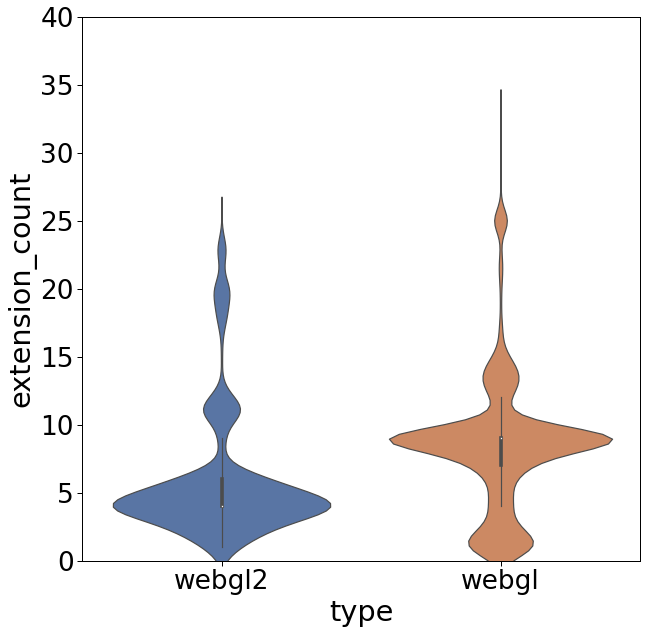

In [37]:
# show the distribution of extension_count of each context TYPE
plt.figure(figsize=(10, 10))
# sns.barplot(data=tmp, x="type", y="extension_count")
# sns.boxplot(data=tmp, x="type", y="extension_count")
sns.violinplot(data=tmp[tmp['extension_count'] > 0], x="type", y="extension_count")
plt.ylim(0, 40)

<Axes: xlabel='used extension', ylabel='type'>

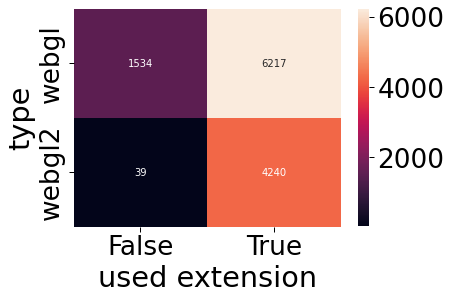

In [38]:
tmpa = tmp.copy()
tmpa['used extension'] = tmpa['extension_count'].apply(lambda x: x > 0)
sns.heatmap(tmpa.groupby(['type', 'used extension']).size().unstack(), annot=True, fmt='d')

In [39]:
df_ext = df_context_noraf[['frame.context.maghsk.extensions', 'frame.context.maghsk.createArguments.0', 'idx']].dropna()
df_ext = df_ext.rename(columns={'frame.context.maghsk.extensions': 'extensions', 'frame.context.maghsk.createArguments.0': 'type'})
df_ext['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)
df_ext['extensions'] = df_ext['extensions'].apply(lambda x: list(set(x)))
df_ext

,extensions,type,idx
0,"[OES_texture_float_linear, EXT_color_buffer_fl...",webgl2,0
3,"[OES_texture_float_linear, EXT_color_buffer_fl...",webgl2,2
4,"[OES_texture_float_linear, EXT_color_buffer_fl...",webgl2,2
5,"[OES_texture_float_linear, EXT_color_buffer_fl...",webgl2,2
6,"[OES_texture_float_linear, EXT_color_buffer_fl...",webgl2,2
...,...,...,...
35471,"[OES_texture_half_float_linear, ANGLE_instance...",webgl,29218
35473,"[MOZ_WEBGL_compressed_texture_etc1, WEBKIT_WEB...",webgl,29219
35477,"[OES_texture_half_float_linear, ANGLE_instance...",webgl,29221
35479,[],webgl,29224


In [40]:
def concatenate_unique(lst):
    return sorted(set([item for sublist in lst for item in sublist]))

In [41]:
df_ext = pd.DataFrame(df_ext.groupby('idx')['extensions'].apply(concatenate_unique), columns=['extensions'])
df_ext

,extensions
idx,
0,"[EXT_color_buffer_float, EXT_color_buffer_half..."
2,"[EXT_color_buffer_float, EXT_texture_filter_an..."
11,"[EXT_shader_texture_lod, OES_standard_derivati..."
15,"[EXT_color_buffer_float, EXT_texture_filter_an..."
17,"[EXT_blend_minmax, EXT_color_buffer_float, EXT..."
...,...
29218,"[ANGLE_instanced_arrays, EXT_texture_filter_an..."
29219,"[MOZ_WEBGL_compressed_texture_astc, MOZ_WEBGL_..."
29221,"[ANGLE_instanced_arrays, OES_element_index_uin..."


In [42]:
(df_ext['extensions'].str.len() > 0).value_counts()

extensions
True     7944
False    1242
Name: count, dtype: int64

In [43]:
df_ext_e = df_ext.explode('extensions').dropna().reset_index(drop=False).rename(columns={'index': 'idx-context'})
df_ext_e['extensions'] = df_ext_e['extensions'].str.lower()
set(df_ext_e['extensions'].tolist())

{'angle_instanced_arrays',
 'ext_blend_minmax',
 'ext_color_buffer_float',
 'ext_color_buffer_float_linear',
 'ext_color_buffer_half_float',
 'ext_disjoint_timer_query',
 'ext_disjoint_timer_query_webgl2',
 'ext_draw_buffers',
 'ext_float_blend',
 'ext_frag_depth',
 'ext_multisampled_render_to_texture',
 'ext_shader_texture_lod',
 'ext_srgb',
 'ext_texture_compression_bptc',
 'ext_texture_compression_rgtc',
 'ext_texture_filter_anisotropic',
 'ext_texture_norm16',
 'gl_img_texture_compression_pvrtc',
 'gl_oes_standard_derivatives',
 'img_texture_compression_pvrtc',
 'khr_parallel_shader_compile',
 'moz_ext_texture_filter_anisotropic',
 'moz_oes_texture_half_float_linear',
 'moz_oes_vertex_array_object',
 'moz_webgl_compressed_texture_astc',
 'moz_webgl_compressed_texture_atc',
 'moz_webgl_compressed_texture_etc',
 'moz_webgl_compressed_texture_etc1',
 'moz_webgl_compressed_texture_pvrtc',
 'moz_webgl_depth_texture',
 'nvx_gpu_memory_info',
 'oculus_multiview',
 'oes_draw_buffers_indexe

In [44]:
unsupported_extension_keywords = [
    '_bptc',
    '_pvrtc',
    '_rgtc',
    '_s3tc',
    # 'debug_renderer',
    'disjoint_timer_query',
    'lose_context',
    'multiview',
    'provoking_vertex'
]
df_ext['unsupported'] = df_ext['extensions'].apply(lambda exts: any([kwd in ext for kwd in unsupported_extension_keywords for ext in exts]))

In [45]:
df_ext.index.nunique()

9186

In [46]:
df_ext[df_ext['unsupported'] == True].index.nunique()

1686

In [47]:
df_ext[df_ext['unsupported'] == True].index.nunique() / df_ext.index.nunique()

0.18354016982364468

In [48]:
df_ext[df_ext['unsupported'] == True]

,extensions,unsupported
idx,,
17,"[EXT_blend_minmax, EXT_color_buffer_float, EXT...",True
21,"[ANGLE_instanced_arrays, EXT_texture_filter_an...",True
37,"[ANGLE_instanced_arrays, EXT_blend_minmax, EXT...",True
39,"[ANGLE_instanced_arrays, EXT_blend_minmax, EXT...",True
68,"[EXT_texture_filter_anisotropic, OES_standard_...",True
...,...,...
29197,"[EXT_blend_minmax, EXT_color_buffer_float, EXT...",True
29208,"[ANGLE_instanced_arrays, OES_vertex_array_obje...",True
29216,"[EXT_texture_filter_anisotropic, WEBGL_debug_r...",True


In [49]:
df_ext['unsupported'].value_counts()

unsupported
False    7500
True     1686
Name: count, dtype: int64

In [50]:
df_ext_e

,idx,extensions
0,0,ext_color_buffer_float
1,0,ext_color_buffer_half_float
2,0,oes_texture_float_linear
3,0,webgl_multisampled_render_to_texture
4,2,ext_color_buffer_float
...,...,...
60586,29235,webgl_debug_shaders
60587,29235,webgl_depth_texture
60588,29235,webgl_draw_buffers
60589,29235,webgl_lose_context


In [51]:
for kwd in unsupported_extension_keywords:
    print(kwd, df_ext_e[df_ext_e.extensions.str.contains(kwd)].idx.nunique())

_bptc 463
_pvrtc 726
_rgtc 86
_s3tc 1429
disjoint_timer_query 620
lose_context 197
multiview 260
provoking_vertex 76


## Context Attributes & Create Arguments

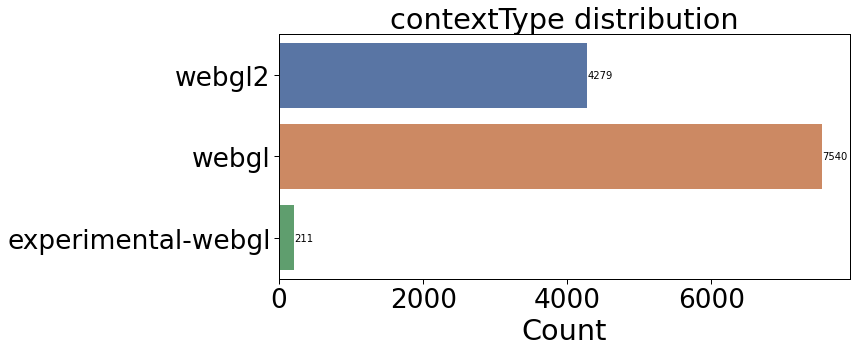

In [52]:
# df_context_noraf["frame.context.maghsk.createArguments.0"].value_counts()
fig, axes = plt.subplots(figsize=(12, 5))
sns.countplot(y="frame.context.maghsk.createArguments.0", data=df_context_noraf, ax=axes)
axes.set_xlabel('Count')
axes.set_ylabel('')
axes.set_title('contextType distribution')
for rect in axes.patches:
    axes.annotate(f'{rect.get_width():.0f}', (rect.get_width(), rect.get_y()+rect.get_height()/2), ha='left', va='center')
plt.tight_layout()
plt.savefig('fig/results_raf_contextType.pdf', bbox_inches='tight')

In [53]:
df_context_noraf.groupby('idx')["frame.context.maghsk.createArguments.0"].unique().explode().value_counts()

frame.context.maghsk.createArguments.0
webgl                 5810
webgl2                3341
experimental-webgl     172
Name: count, dtype: int64

In [54]:
df_context_noraf.columns.tolist()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'manual_interaction',
 'manual_interaction_failed',
 'raf_path',
 'url_essential',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.exception',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPrefe

In [55]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.anialias'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source


In [56]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaviet'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1902,6117,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1.686226e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]


In [57]:
df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference'].fillna('not set').value_counts()

frame.context.maghsk.createArguments.1.powerPreference
not set             6416
default             3504
high-performance    2074
low-power             36
Name: count, dtype: int64

In [58]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference']=='low-power']

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1010,3545,1083,[awwwards],0,1,0,,http://juicebrothers.at,1.686222e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
1902,6117,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1.686226e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
3768,12928,4107,[awwwards],0,1,0,,https://0x.se/,1.686234e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
3769,12928,4107,[awwwards],0,1,0,,https://0x.se/,1.686234e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
4917,17116,4982,[bq],0,1,0,,https://apiida.com/,1.686239e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
6762,23157,6611,[bq],0,1,1,,https://chatchatgame.netlify.app/,1.686245e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
12407,39107,10316,[awwwards],0,1,0,scroll,https://hytek.co.jp/,1.686261e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
17964,56151,14138,[awwwards],0,1,0,,https://peaceprizelaureates.nobelpeacecenter.o...,1.686278e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
18976,58570,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1.686278e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"
18977,58570,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1.686278e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"


In [59]:
create_arguments_columns_list = [
    "frame.context.maghsk.createArguments.0",
    'frame.context.maghsk.createArguments.1.alpha',
    'frame.context.maghsk.createArguments.1.antialias',
    'frame.context.maghsk.createArguments.1.depth',
    'frame.context.maghsk.createArguments.1.desynchronized',
    'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat',
    'frame.context.maghsk.createArguments.1.powerPreference',
    'frame.context.maghsk.createArguments.1.premultipliedAlpha',
    'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
    'frame.context.maghsk.createArguments.1.stencil',
    'frame.context.maghsk.createArguments.1.xrCompatible', ]
tmp = df_context_noraf[create_arguments_columns_list].fillna('not set').rename(columns={
    "frame.context.maghsk.createArguments.0": 'type',
    'frame.context.maghsk.createArguments.1.alpha': 'alpha',
    'frame.context.maghsk.createArguments.1.antialias': 'antialias',
    'frame.context.maghsk.createArguments.1.depth': 'depth',
    'frame.context.maghsk.createArguments.1.desynchronized': 'desynchronized',
    'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat': 'failIfMajorPerformanceCaveat',
    'frame.context.maghsk.createArguments.1.powerPreference': 'powerPreference',
    'frame.context.maghsk.createArguments.1.premultipliedAlpha': 'premultipliedAlpha',
    'frame.context.maghsk.createArguments.1.preserveDrawingBuffer': 'preserveDrawingBuffer',
    'frame.context.maghsk.createArguments.1.stencil': 'stencil',
    'frame.context.maghsk.createArguments.1.xrCompatible': 'xrCompatible',
})
tmp.type.replace({
    'webgl': 'webgl1',
    'experimental-webgl': 'webgl1',
}, inplace=True)

In [60]:
tmp.groupby('type').value_counts()

type    alpha    antialias  depth    desynchronized  failIfMajorPerformanceCaveat  powerPreference   premultipliedAlpha  preserveDrawingBuffer  stencil  xrCompatible
webgl1  not set  not set    not set  not set         not set                       not set           not set             not set                not set  not set         859
        False    False      True     not set         not set                       not set           True                False                  True     not set         658
                 not set    True     not set         not set                       high-performance  not set             not set                True     not set         643
        True     False      True     not set         not set                       not set           not set             not set                True     not set         498
        False    True       True     not set         not set                       not set           True                False                

In [61]:
res = []
for t in ['webgl1', 'webgl2']:
    tmpa = tmp[tmp.type == t].drop(columns='type')
    results = [tmpa[col].value_counts(normalize=True) for col in tmpa.columns]
    results = pd.concat(results, axis=1)
    results.columns = tmpa.columns
    results.drop(['8', '', 8], inplace=True, errors='ignore')
    res.append(results)

In [62]:
total_context = len(tmp)
total_context

12030

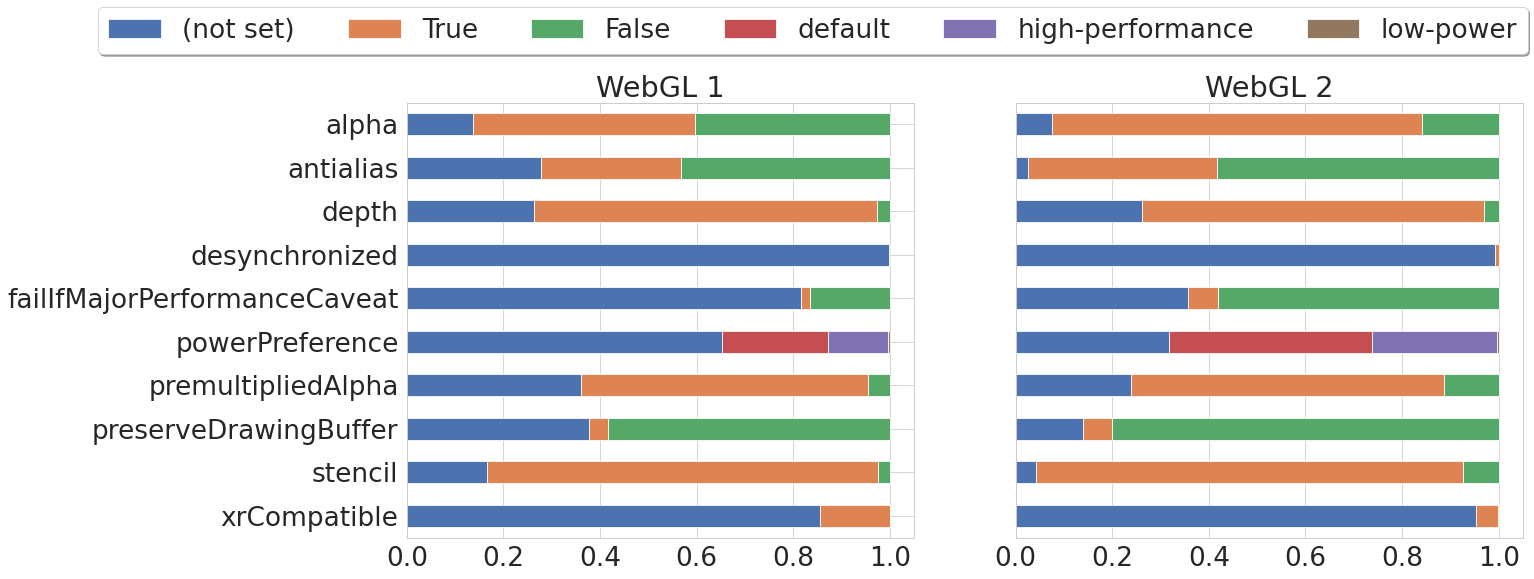

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
# plot a stacked bar chart
for i, gl_type in enumerate(['WebGL 1', 'WebGL 2']):
    # res[i].T[['not set', True, False, 'default', 'high-performance', 'low-power']].sort_values(['not set'], ascending=False).plot(kind='barh', stacked=True, ax=ax[i], legend=False)
    res[i].T[['not set', True, False, 'default', 'high-performance', 'low-power']].sort_index(ascending=False).plot(kind='barh', stacked=True, ax=ax[i], legend=False)
    ax[i].set_title(gl_type)
ax[1].yaxis.set_visible(False)
# results.T.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.legend(['(not set)', True, False, 'default', 'high-performance', 'low-power'], loc='upper center', bbox_to_anchor=(-0.4, 1.25), ncol=6, fancybox=True, shadow=True)
# plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
plt.savefig('fig/results_context_options.pdf', bbox_inches='tight')

array([<Axes: ylabel='powerPreference'>], dtype=object)

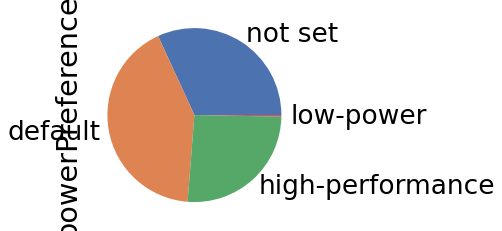

In [66]:
results[['powerPreference']].dropna().plot(kind='pie', subplots=True, legend=False)

In [65]:
# # plot a stacked bar chart
# results.drop(columns=['powerPreference', 'type']).T[['not set', True, False]].sort_values(['not set', True], ascending=False).plot(kind='barh', stacked=True, figsize=(12, 8))
# # results.T.plot(kind='barh', stacked=True, figsize=(10, 8))
# plt.legend(['not set', True, False], loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
# # plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
# plt.savefig('fig/results_context_options.pdf', bbox_inches='tight')

# Resources

In [102]:
resource_columns = df_context_noraf.columns[df_context_noraf.columns.str.startswith('frame.context.maghsk.counter.resources')].tolist()

In [103]:
picked_columns = ['idx', *resource_columns]

In [106]:
df_res = df_context_noraf[picked_columns].fillna(0).groupby('idx').sum().astype(int)
df_res.rename(columns={x: x.split('.')[-1] for x in resource_columns}, inplace=True)

In [107]:
df_res

,Texture,Buffer,Program,Shader,VertexArray,Framebuffer,Renderbuffer,Query,Sampler,TransformFeedback
idx,,,,,,,,,,
0,4,3,1,2,1,0,0,0,0,0
2,45,20,8,20,8,4,0,0,0,0
11,4,24,6,12,0,0,0,0,0,0
15,20,7,3,7,3,14,0,0,0,0
17,841,1849,27,54,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29218,17,32,12,24,0,1,1,0,0,0
29219,15,7,8,17,0,4,0,0,0,0
29221,32,19,3,6,0,0,0,0,0,0


In [115]:
df_res.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,Texture,Buffer,Program,Shader,VertexArray,Framebuffer,Renderbuffer,Query,Sampler,TransformFeedback
count,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000
mean,38.336273,267.165796,8.151753,16.083388,24.529828,5.050185,2.006967,1.500653,0.055193,0.000109
std,282.842156,1803.065731,25.915256,51.611627,232.467732,52.057828,29.703572,103.277219,5.258614,0.010434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,16.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,71.000000,10.000000,20.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
90%,64.000000,355.000000,17.000000,33.000000,18.000000,7.000000,3.000000,0.000000,0.000000,0.000000
95%,114.000000,854.250000,25.000000,48.000000,74.750000,15.000000,6.000000,0.000000,0.000000,0.000000
99%,486.000000,4235.150000,59.000000,115.150000,457.900000,56.000000,20.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Texture', ylabel='Count'>

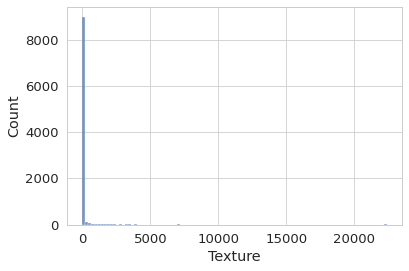

In [118]:
sns.histplot(df_res, x='Texture', bins=100)

In [128]:
df_context_noraf

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
5,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
6,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35471,116504,29218,[bq],0,1,0,,https://zum-nussbaum-frankfurt.de/,1.686340e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
35473,116507,29219,"[awwwards, cssdesign]",0,1,1,TODO,https://zumi.gucci.com/,1.686334e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"
35477,116537,29221,[bq],0,1,0,,https://zungsung.en.taiwantrade.com/,1.686335e+12,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
35479,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]


In [153]:
print(df_context_noraf.columns.tolist())

['idx-frame', 'idx', 'category', 'label_ERROR', 'label_usecase', 'label_interactions', 'label_comments', 'url', 'date', 'netIdleTimeout', 'manual_interaction', 'manual_interaction_failed', 'raf_path', 'url_essential', 'frame.url', 'frame.title', 'frame.date', 'frame.when', 'frame.counter.frames', 'frame.counter.contextsNum', 'frame.counter.usedWebGL', 'frame.counter.usedOffScreenCanvas', 'frame.context.canvasSize', 'frame.context.canvasHidden', 'frame.context.canvasContained', 'frame.context.maghsk.exception', 'frame.context.maghsk.createTime', 'frame.context.maghsk.createArguments.0', 'frame.context.maghsk.createArguments.1.alpha', 'frame.context.maghsk.createArguments.1.depth', 'frame.context.maghsk.createArguments.1.stencil', 'frame.context.maghsk.createArguments.1.antialias', 'frame.context.maghsk.createArguments.1.premultipliedAlpha', 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer', 'frame.context.maghsk.createArguments.1.powerPreference', 'frame.context.maghsk.crea

In [197]:
df_shader = df_context_noraf[['idx', 'frame.context.maghsk.shaders']].rename(columns={'frame.context.maghsk.shaders': 'shaders'}).reset_index(drop=False).rename(columns={'index': 'idx-context'}).explode('shaders').dropna().reset_index(drop=True)
df_shader = df_shader.join(pd.DataFrame(df_shader['shaders'].to_list(), index=df_shader.index).add_prefix('shader.'))
df_shader

,idx-context,idx,shaders,shader.id,shader.compiled,shader.source,shader.translatedSource,shader.type
0,0,0,"{'id': 0, 'compiled': True, 'source': '#versio...",0,True,#version 300 es\nprecision mediump sampler2DAr...,// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\n#ve...,35633
1,0,0,"{'id': 1, 'compiled': True, 'source': '#versio...",1,True,#version 300 es\n#define varying in\nlayout(lo...,// FRAGMENT SHADER BEGIN\n\n// GLSL BEGIN\n\n#...,35632
2,3,2,"{'id': 0, 'compiled': True, 'source': 'precisi...",0,True,precision mediump float;\nvoid main(void){\nfl...,// FRAGMENT SHADER BEGIN\n\n// GLSL BEGIN\n\np...,35632
3,3,2,"{'id': 1, 'compiled': True, 'source': 'precisi...",1,True,precision highp float;\n#define SHADER_NAME pi...,// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\npre...,35633
4,3,2,"{'id': 2, 'compiled': True, 'source': 'precisi...",2,True,precision mediump float;\n#define SHADER_NAME ...,// FRAGMENT SHADER BEGIN\n\n// GLSL BEGIN\n\np...,35632
...,...,...,...,...,...,...,...,...
147737,35482,29235,"{'id': 11, 'compiled': True, 'source': ' #if...",11,True,\n #ifdef GL_ES\n precision highp float;\n ...,// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\n\n ...,35633
147738,35482,29235,"{'id': 12, 'compiled': True, 'source': '#defin...",12,True,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,// FRAGMENT SHADER BEGIN\n\n// GLSL BEGIN\n\n#...,35632
147739,35482,29235,"{'id': 13, 'compiled': True, 'source': '#defin...",13,True,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\n#de...,35633
147740,35482,29235,"{'id': 14, 'compiled': True, 'source': '#defin...",14,True,#define HAS_UNIFORM_u_fill_color\n#define HAS_...,// FRAGMENT SHADER BEGIN\n\n// GLSL BEGIN\n\n#...,35632


In [213]:
df_shader = df_shader[df_shader['shader.source'].map(lambda x: type(x)) == str]
df_shader = df_shader[df_shader['shader.translatedSource'].str.len() > 0]

In [217]:
pattern = r"// INITIAL HLSL BEGIN\n*(.*?)\n*// INITIAL HLSL END"
def translated_source_to_hlsl(s: str):
    result = re.search(pattern, s, re.DOTALL)
    if result:
        return result.group(1)
    print(f'"{s}"')
    raise ValueError('No match found')

In [218]:
df_shader['shader.source'].map(lambda x: type(x)).value_counts()

shader.source
<class 'str'>    147470
Name: count, dtype: int64

In [220]:
df_shader['shader.translatedSource'] = df_shader['shader.translatedSource'].map(translated_source_to_hlsl)

In [223]:
print(df_shader['shader.translatedSource'][0])

#pragma warning( disable: 3556 3571 )
float3 vec3_ctor(float3 x0)
{
    return float3(x0);
}
float4 vec4_ctor(float3 x0, float x1)
{
    return float4(x0, x1);
}
// Uniforms

uniform float4x4 _modelViewMatrix : register(c1);
uniform float4x4 _projectionMatrix : register(c5);
uniform float3x3 _normalMatrix : register(c9);
#ifdef ANGLE_ENABLE_LOOP_FLATTEN
#define LOOP [loop]
#define FLATTEN [flatten]
#else
#define LOOP
#define FLATTEN
#endif

#define ATOMIC_COUNTER_ARRAY_STRIDE 4

// Attributes
static float3 _position = {0, 0, 0};
static float3 _normal = {0, 0, 0};

static float4 gl_Position = float4(0, 0, 0, 0);

// Varyings
static  float3 _vViewPosition = {0, 0, 0};
static  float _vFogDepth = {0};

cbuffer DriverConstants : register(b1)
{
    float4 dx_ViewAdjust : packoffset(c1);
    float2 dx_ViewCoords : packoffset(c2);
    float2 dx_ViewScale  : packoffset(c3);
    float clipControlOrigin : packoffset(c3.w);
    float clipControlZeroToOne : packoffset(c4);
};

@@ VERTEX ATTRIBUTES 

In [231]:
import json

a = [['%05d' % idx, url] for _, (idx, url) in df_context_noraf[['idx', 'url']].iterrows()]
with open('output/0611-all_essential.json', 'w') as fp:
    json.dump(a, fp)
print(len(a))

12030
